In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
!pip install folium
!pip install geopandas
!conda install -c conda-forge geoplot
import folium
import geopandas

tensorboard 1.6.0 has requirement bleach==1.5.0, but you'll have bleach 3.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
tensorboard 1.6.0 has requirement bleach==1.5.0, but you'll have bleach 3.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

ResolvePackageNotFound: 
  - scikit-learn=0.20.2



In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
sum(df.id.duplicated())

177

In [5]:
df.loc[df['id'].duplicated(keep = False)] # shows all duplicates - and original to see if they are duplicated across all rows
# looks like some id duplicates have different dates - indicating multiple sales of the same house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [6]:
df.loc[((df['id'].duplicated(keep = False)) & (df['price'].duplicated(keep = False)))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [7]:
# We checked for duplicates and couldn't find any exact duplicates across the df. There was a small number (312) 
# of houses that had sold more than once as opposed to being duplicate entries, but this was an insufficient 
# sample size for doing any meaningful analysis and they all had different dates. 

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [10]:
# checking for nan and any other null values in our prioritized columns


In [11]:
df.price.isna().sum()

0

In [12]:
df.sqft_living.isna().sum()

0

In [13]:
df.lat.isna().sum()

0

In [14]:
df.long.isna().sum()

0

In [15]:
df.price.value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
250000.0    130
475000.0    120
330000.0    119
650000.0    117
275000.0    113
415000.0    111
315000.0    111
390000.0    110
600000.0    110
440000.0    109
280000.0    109
320000.0    107
435000.0    105
340000.0    103
310000.0    101
335000.0     98
420000.0     97
360000.0     96
260000.0     95
265000.0     94
           ... 
402395.0      1
575550.0      1
271310.0      1
242150.0      1
837500.0      1
608095.0      1
287653.0      1
484259.0      1
336800.0      1
873000.0      1
837700.0      1
118000.0      1
641200.0      1
969000.0      1
386180.0      1
608500.0      1
542950.0      1
968933.0      1
641250.0      1
575700.0      1
739500.0      1
575575.0      1
418900.0      1
234975.0      1
804995.0      1
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 362

In [16]:
df.sqft_living.value_counts()

1300     138
1400     135
1440     133
1660     129
1010     129
1800     129
1820     128
1480     125
1720     125
1540     124
1560     124
1320     122
1250     120
1580     119
1200     118
1370     118
1650     117
1900     117
1780     117
1680     116
2100     116
1460     116
1430     115
1740     115
1830     114
1510     114
1340     113
1260     113
1500     112
1240     112
        ... 
2153       1
2105       1
2007       1
6085       1
2015       1
8020       1
12050      1
1767       1
1639       1
2473       1
440        1
2601       1
5210       1
3545       1
1496       1
5530       1
1352       1
3305       1
1256       1
3273       1
1048       1
2665       1
5130       1
3065       1
3001       1
4970       1
2905       1
2793       1
4810       1
1975       1
Name: sqft_living, Length: 1034, dtype: int64

In [17]:
df.lat.value_counts()

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
47.6886    16
47.6955    16
47.6647    15
47.6904    15
47.6860    15
47.6842    15
47.5402    15
47.5518    14
47.6853    14
47.5427    14
47.5323    14
47.5396    14
47.6729    14
47.5445    14
47.6844    14
47.6727    14
47.7076    14
47.5533    14
47.6651    14
47.6914    14
47.6374    14
47.5342    14
47.6534    14
47.5400    14
47.6821    14
           ..
47.4004     1
47.5152     1
47.3753     1
47.2063     1
47.4140     1
47.5410     1
47.6290     1
47.3578     1
47.4138     1
47.4717     1
47.6564     1
47.3354     1
47.3923     1
47.1808     1
47.3890     1
47.6613     1
47.2679     1
47.4085     1
47.2685     1
47.3240     1
47.4671     1
47.2034     1
47.3346     1
47.4154     1
47.2012     1
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

In [18]:
df.long.value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
           ... 
-122.454      1
-121.835      1
-122.519      1
-122.469      1
-121.788      1
-121.891      1
-121.325      1
-122.447      1
-121.760      1
-122.514      1
-121.725      1
-121.716      1
-121.803      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.359      1
-121.733      1
-121.711      1
-121.767      1
-121.480      1
-121.701      1
-122.479      1
-122.467      1
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751,

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [20]:
np.dtype(df.date)

dtype('O')

In [21]:
type(df.date[1])

str

In [22]:
df.date.value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/22/2015     121
7/9/2014      121
4/14/2015     121
4/28/2015     121
6/24/2014     119
4/21/2015     119
10/28/2014    117
8/26/2014     117
5/20/2014     116
7/14/2014     116
7/1/2014      115
8/20/2014     114
4/29/2015     113
6/17/2014     113
4/8/2015      112
7/29/2014     112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/25/2014     109
3/27/2015     109
8/5/2014      109
8/11/2014     107
6/20/2014     107
             ... 
5/9/2015        3
11/9/2014       3
2/14/2015       3
12/7/2014       2
8/9/2014        2
2/1/2015        2
9/7/2014        2
12/27/2014      2
10/11/2014      2
5/10/2015       2
7/4/2014        2
11/15/2014      2
12/21/2014      2
8/24/2014       2
5/11/2014       2
11/28/2014      2
11/30/2014      1
2/15/2015       1
3/8/2015        1
1/10/2015       1
5/27/2015       1
5/17/2014       1
8/3/2014        1
5/24/2015       1
8/30/2014 

In [23]:
df['datetime_date'] = pd.to_datetime(df['date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
datetime_date    21597 non-null datetime64[ns]
dtypes: datetime64[ns](1), f

In [25]:
df.datetime_date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: datetime_date, dtype: datetime64[ns]

In [26]:
df['renovated'] = ''

In [27]:
df.loc[(df['yr_renovated'] != 0), 'renovated'] = 1
df.loc[(df['yr_renovated'] == 0), 'renovated'] = 0
df.loc[df['yr_renovated'].isna(), 'renovated'] = 0
# If there is a null value or zero for year of renovation, we've set it zero. 


In [28]:
df['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

In [29]:
# adding a column for 'year last modified' - houses with value zero for renovation will have their yr_built
# value instead

df['yr_last_updated'] = df['yr_renovated']
df.loc[(df['renovated'] == 0), 'yr_last_updated'] = df.loc[(df['renovated']) == 0]['yr_built']

In [30]:
# we inspect the NaN values in yr_renovated and checked the measures of dispersion on yr_built to check our
# houses that had null values before deciding to either drop them or mark them as not renovated.
# We've come to the conclusion to replace Nan values with not renovated on the assumption that renovation would 
# have been advertized otherwise when trying to sell the house.


df.loc[df['yr_renovated']<1]
df.loc[df['yr_renovated'].isna()]['yr_built'].describe()

count    3842.000000
mean     1970.499219
std        29.477479
min      1900.000000
25%      1950.000000
50%      1974.000000
75%      1996.000000
max      2015.000000
Name: yr_built, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                 21597 non-null int64
date               21597 non-null object
price              21597 non-null float64
bedrooms           21597 non-null int64
bathrooms          21597 non-null float64
sqft_living        21597 non-null int64
sqft_lot           21597 non-null int64
floors             21597 non-null float64
waterfront         19221 non-null float64
view               21534 non-null float64
condition          21597 non-null int64
grade              21597 non-null int64
sqft_above         21597 non-null int64
sqft_basement      21597 non-null object
yr_built           21597 non-null int64
yr_renovated       17755 non-null float64
zipcode            21597 non-null int64
lat                21597 non-null float64
long               21597 non-null float64
sqft_living15      21597 non-null int64
sqft_lot15         21597 non-null int64
datetime_date      21597 non-null

In [32]:
df.yr_last_updated.isna().sum()

0

In [33]:
df['price_per_sqft'] = df['price']/df['sqft_living']

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


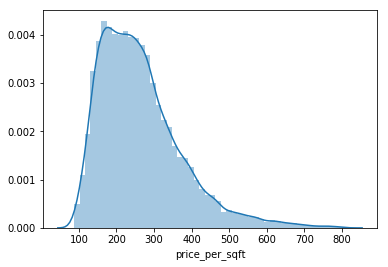

In [34]:
sns.distplot(df['price_per_sqft'], bins = 50)

In [35]:
df.loc[df['renovated'] == 1].describe()
# Is the count below on id and price expected? // TO REVIEW

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yr_last_updated,price_per_sqft
count,7.440000e+02,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,652.000000,743.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.000000,744.000000
mean,4.418716e+09,7.689019e+05,3.459677,2.306116,2327.377688,16215.530914,1.504704,0.044479,0.600269,3.219086,...,1939.455645,1995.928763,98095.623656,47.580564,-122.262043,1988.877688,13390.768817,1.0,1995.928763,321.338135
std,2.908265e+09,6.271258e+05,1.068823,0.898233,1089.002040,38235.308760,0.493202,0.206314,1.212180,0.520494,...,22.088850,15.599946,54.861316,0.120855,0.129586,715.440144,26213.648057,0.0,15.599946,131.606186
min,3.600057e+06,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,0.000000,0.000000,1.000000,...,1900.000000,1934.000000,98001.000000,47.196000,-122.497000,828.000000,1281.000000,1.0,1934.000000,102.888087
25%,1.922985e+09,4.122500e+05,3.000000,1.750000,1560.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,1921.000000,1987.000000,98040.000000,47.523350,-122.358000,1460.000000,5000.000000,1.0,1987.000000,219.838162
50%,3.899100e+09,6.075020e+05,3.000000,2.250000,2200.000000,7375.000000,1.500000,0.000000,0.000000,3.000000,...,1941.500000,2000.000000,98112.000000,47.602800,-122.292000,1850.000000,7455.000000,1.0,2000.000000,301.562882
75%,7.014200e+09,9.000000e+05,4.000000,2.750000,2872.500000,12670.750000,2.000000,0.000000,0.000000,3.000000,...,1955.000000,2007.250000,98126.000000,47.670950,-122.210000,2380.000000,10925.750000,1.0,2007.250000,393.196169
max,9.829200e+09,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,1.000000,4.000000,5.000000,...,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000,1.0,2015.000000,798.122066


In [36]:
df.loc[df['renovated'] == 0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yr_last_updated,price_per_sqft
count,2.085300e+04,2.085300e+04,20853.000000,20853.000000,20853.000000,2.085300e+04,20853.000000,18569.000000,20791.000000,20853.000000,...,20853.000000,17011.0,20853.000000,20853.000000,20853.000000,20853.000000,20853.000000,20853.0,20853.000000,20853.000000
mean,4.586246e+09,5.321403e+05,3.370115,2.109037,2071.507313,1.505959e+04,1.493718,0.006301,0.220769,3.416631,...,1972.125114,0.0,98077.321345,47.559363,-122.212268,1986.539778,12735.717499,0.0,1972.125114,262.102755
std,2.875507e+09,3.518947e+05,0.920686,0.763118,910.209733,4.152180e+04,0.541274,0.079129,0.741496,0.653691,...,28.974784,0.0,53.357658,0.139088,0.140805,684.145745,27311.862519,0.0,28.974784,108.598829
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.0,1900.000000,87.588235
25%,2.125059e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,...,1953.000000,0.0,98032.000000,47.468600,-122.327000,1490.000000,5100.000000,0.0,1953.000000,181.318681
50%,3.904931e+09,4.490000e+05,3.000000,2.250000,1900.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1976.000000,0.0,98065.000000,47.570600,-122.227000,1840.000000,7622.000000,0.0,1976.000000,243.190661
75%,7.326200e+09,6.350000e+05,4.000000,2.500000,2540.000000,1.062600e+04,2.000000,0.000000,0.000000,4.000000,...,1998.000000,0.0,98117.000000,47.678300,-122.123000,2360.000000,10061.000000,0.0,1998.000000,315.405405
max,9.900000e+09,6.890000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.0,2015.000000,810.138889


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


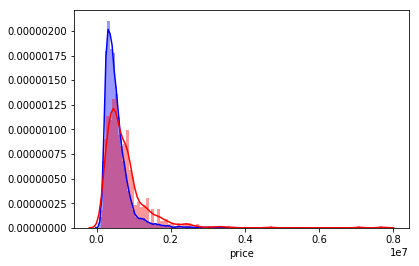

In [37]:
sns.distplot(df.loc[df['renovated'] == 0]['price'], color = 'blue', bins = 100)
sns.distplot(df.loc[df['renovated'] == 1]['price'], color = 'red', bins = 100)


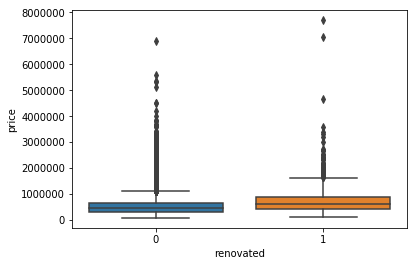

In [38]:
sns.boxplot(x = df['renovated'], y = df['price'])


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


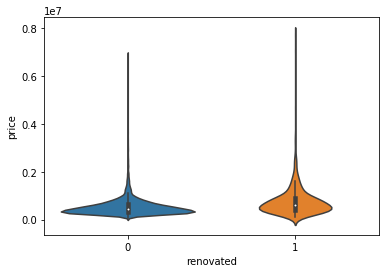

In [39]:
sns.violinplot(x = df['renovated'], y = df['price'])

In [40]:
df.loc[df['renovated'] == 1]['price'].quantile(.75)

900000.0

(0, 2000000)

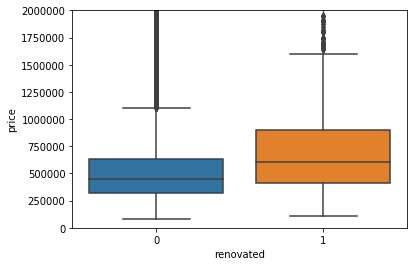

In [41]:
sns.boxplot(x = df['renovated'], y = df['price'])

plt.ylim([0,2000000])


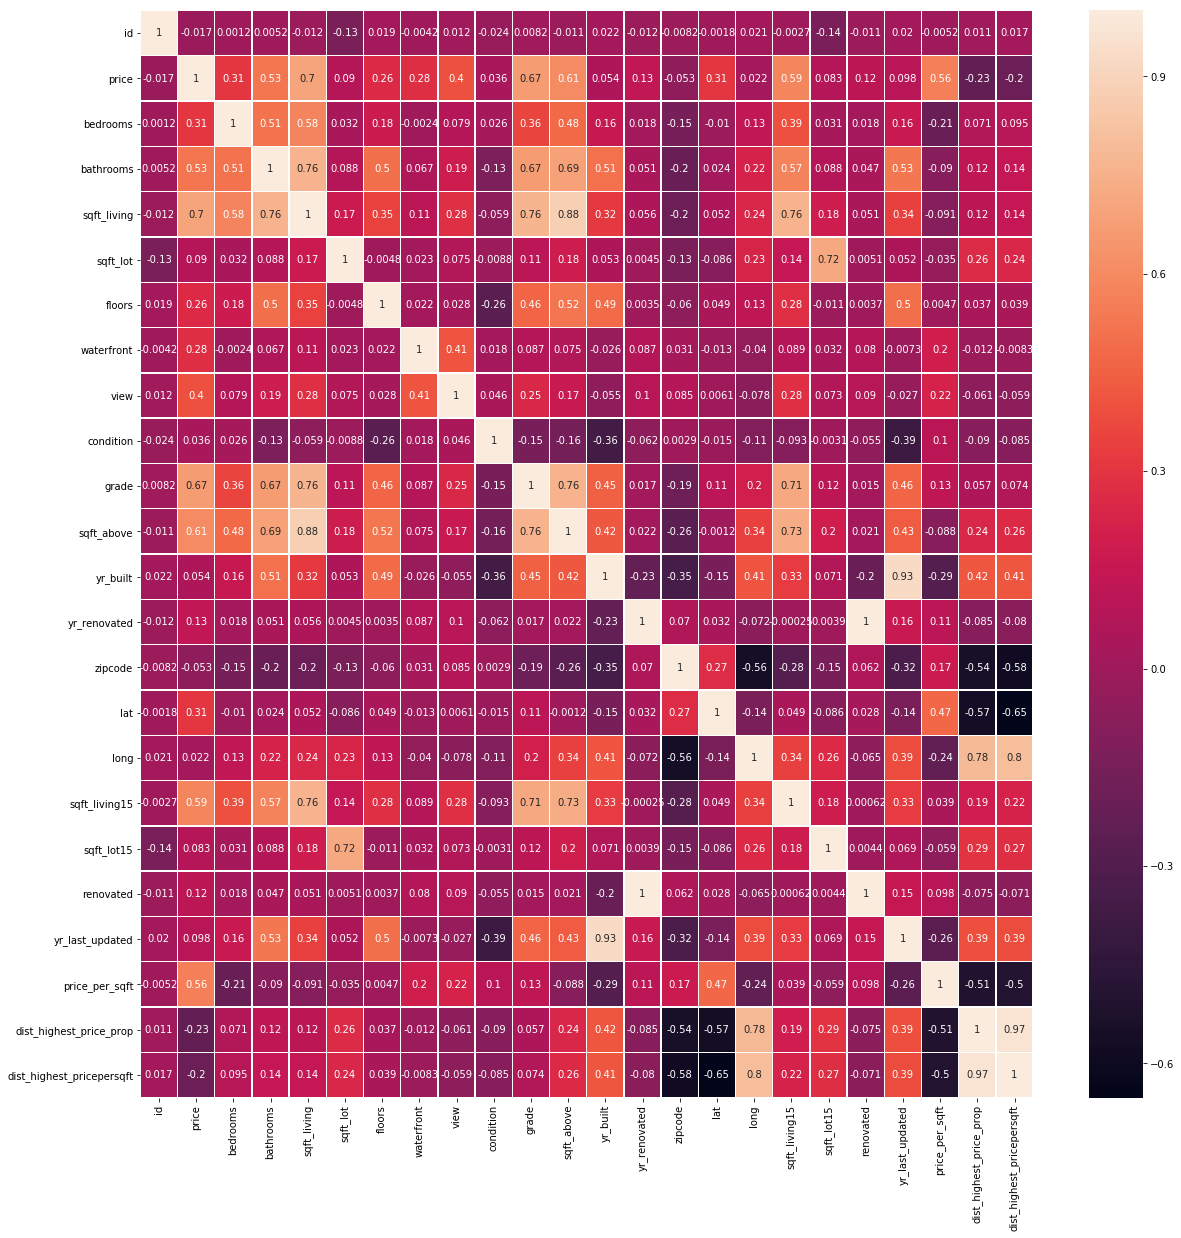

In [81]:
fig, ax =  plt.subplots(figsize=(20,20))
matrix = df.corr()
sns.heatmap(matrix, annot=True, linewidths = 0.4, ax = ax)


In [43]:
df['yr_last_updated'].describe()

count    21597.000000
mean      1972.945131
std         28.945393
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_last_updated, dtype: float64

In [44]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [45]:
# How have we managed to reduce the correlation strength on price by 
# using yr last updated instead of yr renovated, which contains many
# zero values?

In [46]:
# using folium library to paint a more descriptie picture of the KC County and of the sales
index_range = range(0,22000,1000)

In [47]:
KC_map = folium.Map([df['lat'].mean(),df['long'].mean()])


KC_markers=[]
for x in (index_range):
    KC_markers.append(folium.Marker([df.iloc[x]['lat'],df.iloc[x]['long']]))


In [48]:
# adding markers and displaying the KC map
for marker in KC_markers:
    marker.add_to(KC_map)
    
KC_map

In [49]:
### for the near future: could plot a heatmap of the area using geopandas: 

In [50]:
# Determining the relationship between distance to highest priced property (which we're taking to be a placeholder
# for a price nucleus) and the price

In [51]:
# fn for calculating the distance to highest priced property
def dist_to_highest_priced(dataframe):
    x = dataframe['lat']
    y = dataframe['long']
    highest_x = 47.6298
    highest_y = -122.323
    return np.sqrt((x - highest_x)**2 + (y - highest_y)**2)


In [52]:
# adding new column for distance to highest priced property
df['dist_highest_price_prop'] = dist_to_highest_priced(df)

In [53]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,datetime_date,renovated,yr_last_updated,price_per_sqft,dist_highest_price_prop
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,2014-05-21,0,2009.0,235.294118,0.073207
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,2015-02-23,0,2014.0,173.160173,0.125323
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,2014-06-23,0,2009.0,394.216667,0.042769
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,98027,47.5345,-122.069,1410,1287,2015-01-16,0,2004.0,250.000000,0.271290
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,98144,47.5941,-122.299,1020,1357,2014-10-15,0,2008.0,318.627451,0.043017


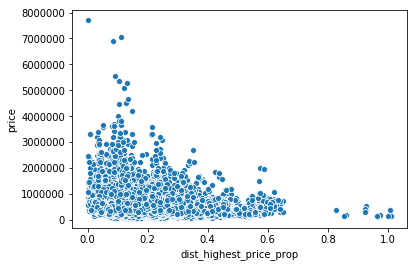

In [54]:
# plotting the distance from the highest priced property against price, which shows a weak negative relationship

sns.scatterplot(x = df.dist_highest_price_prop, y = df.price)

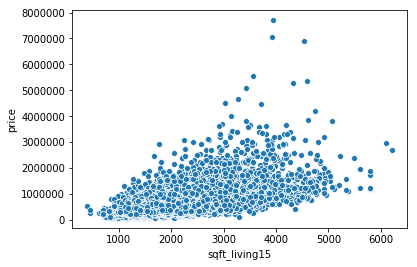

In [55]:
# When looking at the amount of sqft for the nearest 15 neighbours, this variable unexpectedly has a relatively 
# strong correlation with price - 0.59 (sqft_lot, on the other hand, has a correlation of less than 1). Moreover,
# when comparing it with other variables - grade, sqft_living and bathrooms - there were further strong coefficients. 
# Overall, this would indicate that property prices depend strongly on the local neighbourhood prices and warrants 
# further investigation into using position in the county as a predictive variable.

sns.scatterplot(x = df.sqft_living15, y = df.price)

In [56]:
# checking for null values in sqft_living15
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
1580    167
1610    166
1800    166
1720    166
1620    164
1510    164
1760    163
1480    160
1410    159
1550    158
1820    157
1680    157
1670    157
1520    155
1660    155
1300    154
1780    154
1570    154
1470    153
1640    152
1600    149
1320    148
1530    148
1420    148
1690    148
       ... 
2091      1
2155      1
2363      1
1448      1
1352      1
1336      1
2297      1
1303      1
1399      1
1415      1
3494      1
1463      1
1495      1
1815      1
1943      1
4250      1
4330      1
4362      1
1304      1
2409      1
2425      1
4490      1
4570      1
2697      1
2793      1
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


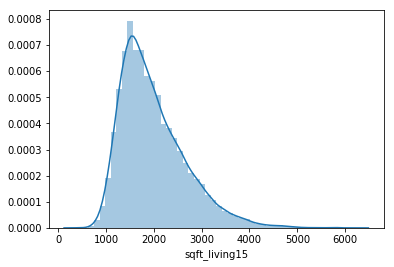

In [57]:
sns.distplot(df.sqft_living15)

In [76]:
df.loc[df['price_per_sqft'] == df['price_per_sqft'].max()]['lat']
df.loc[df['price_per_sqft'] == df['price_per_sqft'].max()]['long']

19321   -122.387
Name: long, dtype: float64

In [77]:
# fn for calculating the distance to highest priced property per sqft
def dist_to_highest_pricedpersqft(dataframe):
    x = dataframe['lat']
    y = dataframe['long']
    highest_x = 47.6902
    highest_y = -122.387
    return np.sqrt((x - highest_x)**2 + (y - highest_y)**2)

In [78]:
df['dist_highest_pricepersqft'] = dist_to_highest_pricedpersqft(df)

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,datetime_date,renovated,yr_last_updated,price_per_sqft,dist_highest_price_prop,dist_highest_pricepersqft
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,2014-10-13,0,1955.0,188.050847,0.135728,0.221226
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,2014-12-09,1,1991.0,209.338521,0.091288,0.074650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,2015-02-25,0,1933.0,233.766234,0.140661,0.161218
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,2014-12-09,0,1965.0,308.163265,0.129541,0.169506
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,2015-02-18,0,1987.0,303.571429,0.278304,0.349788


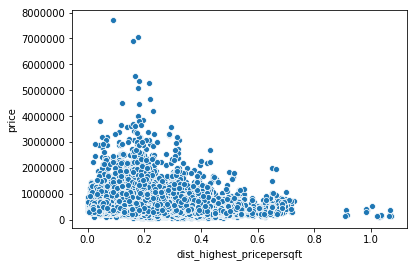

In [80]:
sns.scatterplot(df.dist_highest_pricepersqft,df.price)

In [82]:
cleaned_df = df

In [83]:
cleaned_df.to_csv('cleaned_data.csv')


In [ ]:
cleane